In [69]:
import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
import statsmodels
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [70]:
transactions_im = pd.read_csv('transactions_cluster4.csv', header=0)

In [71]:
transactions = transactions_im.fillna(0)

In [72]:
transactions['date'] = pd.to_datetime(transactions['date'], format = '%Y-%m-%d')
transactions = transactions.set_index('date')

In [73]:
ts = transactions.mean(axis=1)
ts.head()

date
2013-01-01    929.333333
2013-01-02    951.666667
2013-01-03    857.000000
2013-01-04    807.583333
2013-01-05    994.000000
dtype: float64

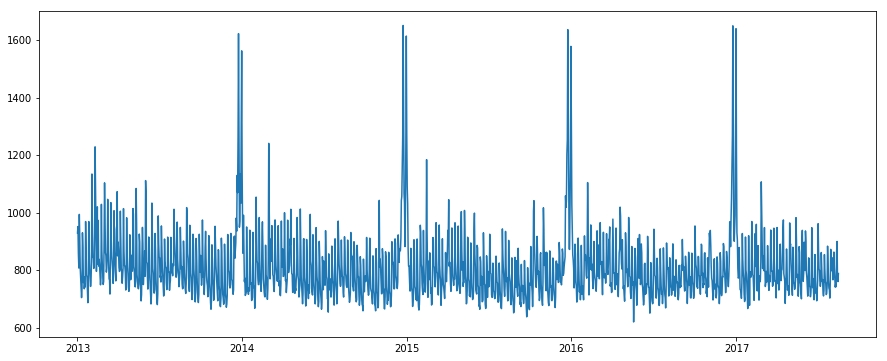

In [74]:
plt.plot(ts.index.to_pydatetime(), ts.values)

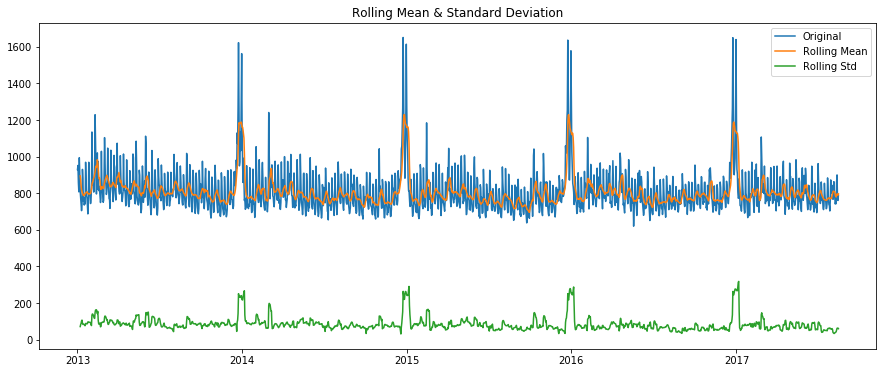

In [75]:
rolmean = ts.rolling(window=7).mean()
rolstd = ts.rolling(window=7).std()

#Plot rolling statistics:
orig = plt.plot(ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [76]:
test = adfuller(ts, autolag='AIC')
print('ADF Statistic: \t\t' + str(test[0]))
print('P Value: \t\t' + str(test[1]))
print('Lags Used: \t\t' + str(test[2]))
print('Observations: \t\t' + str(test[3]))
for key,value in test[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
print('Information Criterion: \t' + str(test[5]))

ADF Statistic: 		-7.94821504424
P Value: 		3.1774717081e-12
Lags Used: 		21
Observations: 		1666
Critical Value 1%: 	-3.43428121504
Critical Value 5%: 	-2.86327640807
Critical Value 10%: 	-2.56769442141
Information Criterion: 	18292.934951


In [77]:
ts_log = np.log(ts)

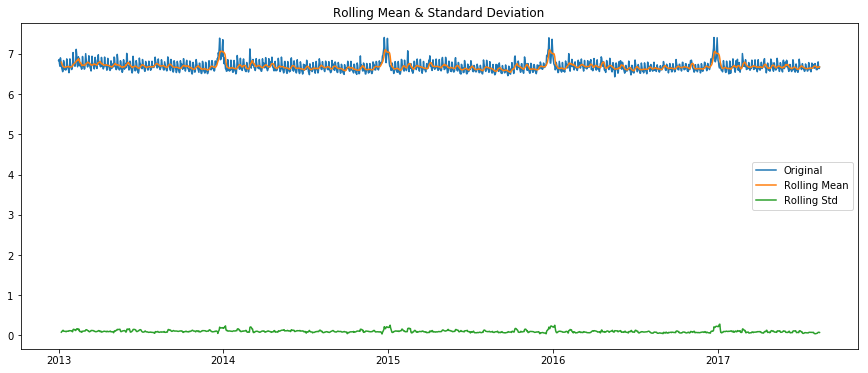

In [78]:
rolmean = ts_log.rolling(window=7).mean()
rolstd = ts_log.rolling(window=7).std()

#Plot rolling statistics:
orig = plt.plot(ts_log, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [79]:
test = adfuller(ts_log, autolag='AIC')
print('ADF Statistic: \t\t' + str(test[0]))
print('P Value: \t\t' + str(test[1]))
print('Lags Used: \t\t' + str(test[2]))
print('Observations: \t\t' + str(test[3]))
for key,value in test[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
print('Information Criterion: \t' + str(test[5]))

ADF Statistic: 		-8.06978336465
P Value: 		1.5607695749e-12
Lags Used: 		21
Observations: 		1666
Critical Value 1%: 	-3.43428121504
Critical Value 5%: 	-2.86327640807
Critical Value 10%: 	-2.56769442141
Information Criterion: 	-4510.55378066


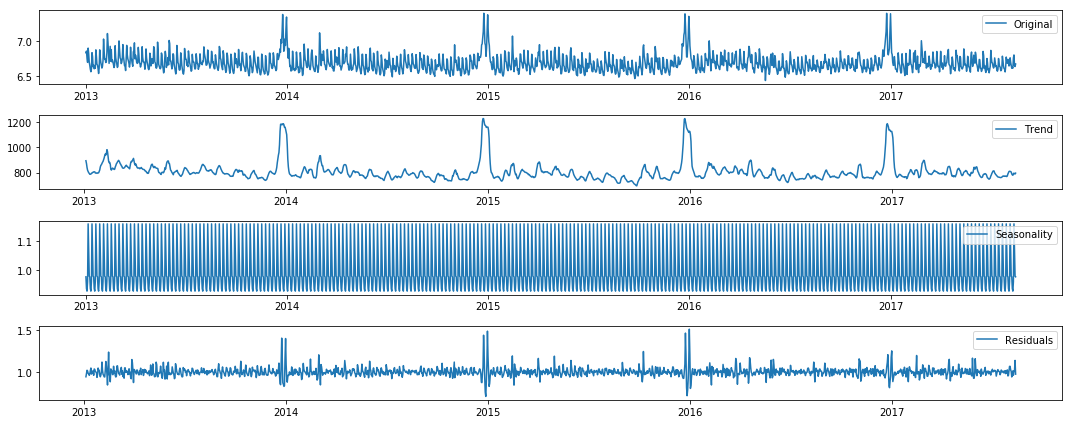

In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

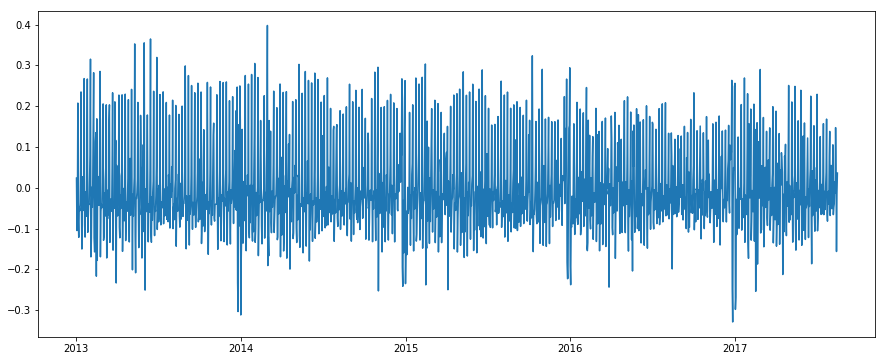

In [81]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff.index.to_pydatetime(), ts_log_diff.values)

In [82]:
ts_log_diff.dropna(inplace=True)

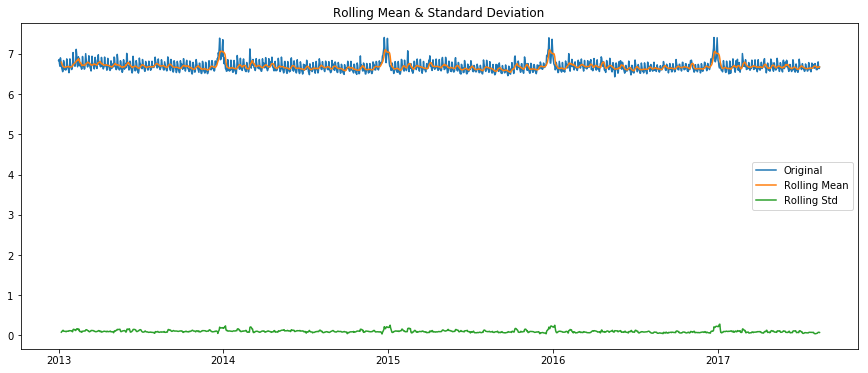

In [83]:
rolmean = ts_log.rolling(window=7).mean()
rolstd = ts_log.rolling(window=7).std()

#Plot rolling statistics:
orig = plt.plot(ts_log, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [84]:
test = adfuller(ts, autolag='AIC')
print('ADF Statistic: \t\t' + str(test[0]))
print('P Value: \t\t' + str(test[1]))
print('Lags Used: \t\t' + str(test[2]))
print('Observations: \t\t' + str(test[3]))
for key,value in test[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
print('Information Criterion: \t' + str(test[5]))

ADF Statistic: 		-7.94821504424
P Value: 		3.1774717081e-12
Lags Used: 		21
Observations: 		1666
Critical Value 1%: 	-3.43428121504
Critical Value 5%: 	-2.86327640807
Critical Value 10%: 	-2.56769442141
Information Criterion: 	18292.934951


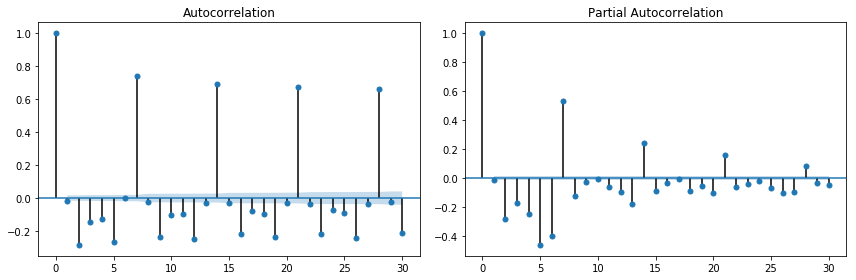

In [85]:
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(ts_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(ts_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

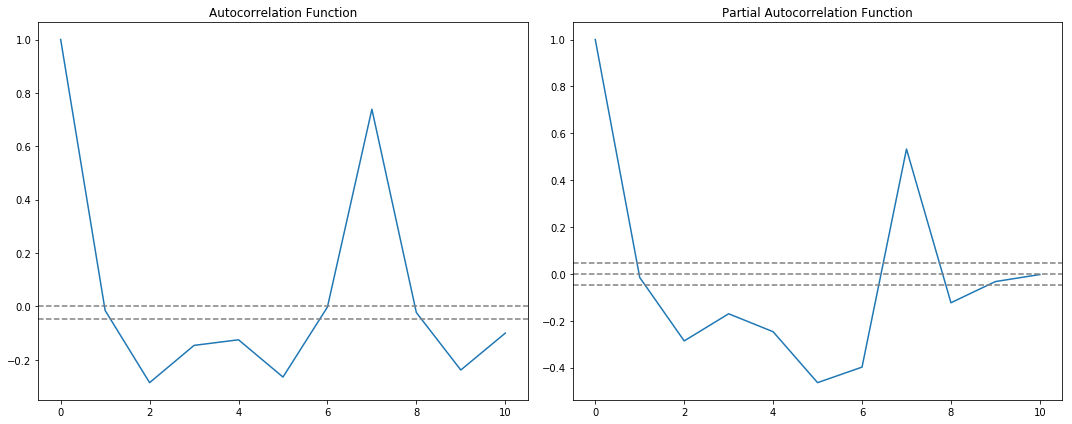

In [86]:
#ACF and PACF plots

lag_acf = acf(ts_log_diff, nlags=10)
lag_pacf = pacf(ts_log_diff, nlags=10, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [87]:
train_size = int(len(ts_log_diff) * 0.9)
test_size = len(ts_log_diff) - train_size
train, test = ts_log_diff[ts_log_diff.index[0].to_pydatetime():ts_log_diff.index[train_size].to_pydatetime()], ts_log_diff[ts_log_diff.index[train_size].to_pydatetime():ts_log_diff.index[len(ts_log_diff)-1].to_pydatetime()]
print(len(train), len(test))

1519 169


In [88]:
model = ARIMA(ts_log_diff[:1181], order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1) 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [89]:
predictions=results_ARIMA.predict(start=ts_log_diff.index[1150],end=ts_log_diff.index[1686])

Text(0.5,1,'RSS: nan')

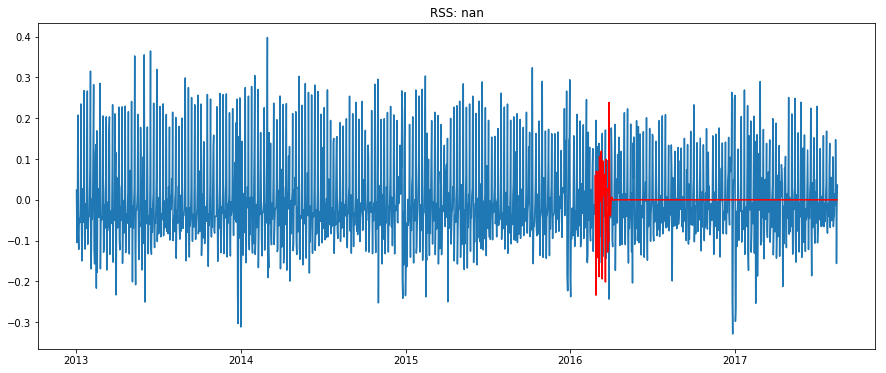

In [90]:
plt.plot(ts_log_diff.index.to_pydatetime(), ts_log_diff.values)
plt.plot(ts_log_diff.index[1149:1686].to_pydatetime(), predictions, color='red')
plt.title('RSS: %.4f'% sum((predictions-ts_log_diff)**2))

In [91]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1180
Model:                 ARIMA(2, 1, 2)   Log Likelihood                1042.953
Method:                       css-mle   S.D. of innovations              0.100
Date:                Thu, 14 Dec 2017   AIC                          -2073.906
Time:                        19:34:48   BIC                          -2043.466
Sample:                    01-03-2013   HQIC                         -2062.430
                         - 03-27-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.016e-07   2.21e-06      0.182      0.856   -3.93e-06    4.73e-06
ar.L1.D.y      0.5939      0.024     25.199      0.000       0.548       0.640
ar.L2.D.y     -0.3035      0.027    -11.446      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


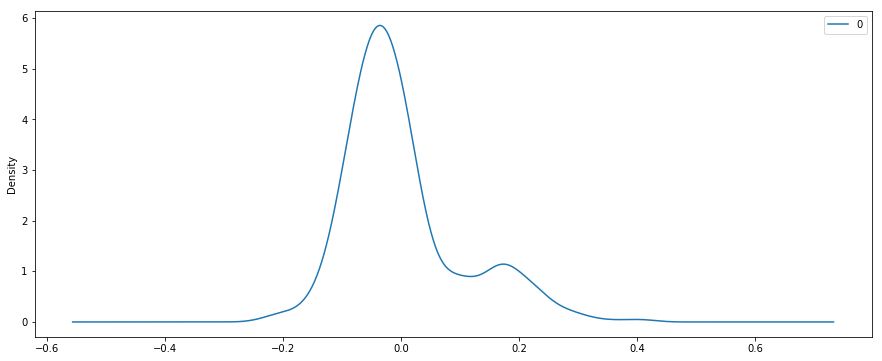

In [92]:
# plot residual errors
residuals = DataFrame(results_ARIMA.resid)
residuals.plot(kind='kde')

In [93]:
print(residuals.describe())

                 0
count  1180.000000
mean      0.000608
std       0.100091
min      -0.234516
25%      -0.062384
50%      -0.023019
75%       0.029671
max       0.410321


In [94]:
predictions_ARIMA_diff = pd.Series(predictions, copy=True)
print(predictions_ARIMA_diff.head())

2016-02-26    0.058609
2016-02-27   -0.031439
2016-02-28   -0.233579
2016-02-29    0.070211
2016-03-01    0.053987
Freq: D, dtype: float64


In [95]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index[1150:1686])

In [96]:
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

In [97]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

Text(0.5,1,'RMSE: nan')

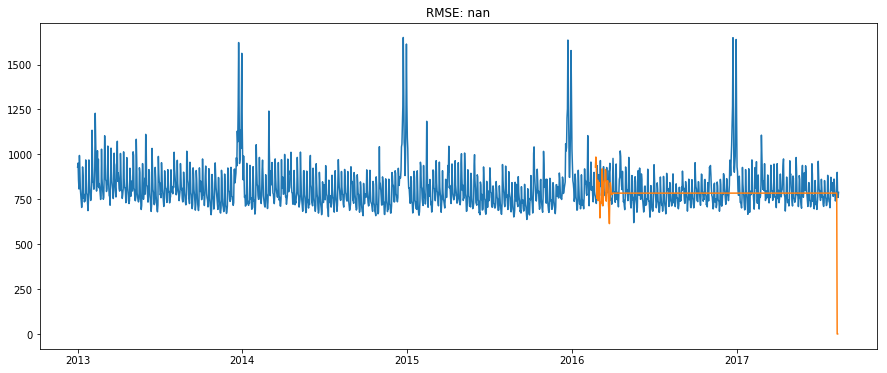

In [98]:
plt.plot(ts.index.to_pydatetime(), ts.values)
plt.plot(ts.index[1148:1686].to_pydatetime(), predictions_ARIMA.values)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts[1148:1686])**2)/test_size))

In [99]:
expected=list(ts)

In [100]:
bias=[expected[i+1148]-predictions_ARIMA[i] for i in range(len(predictions_ARIMA))]

In [101]:
mean_forcast_error=sum(bias)/len(bias)
print('Mean forcast error: %f' % mean_forcast_error)

Mean forcast error: 17.289702


In [102]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(expected[1148:1686], predictions_ARIMA)
print('MAE: %f' % mae)

MAE: 72.179015


In [104]:
def __getnewargs__(self):
    return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))

ARIMA.__getnewargs__ = __getnewargs__
results_ARIMA.save('ARIMA-cluster4.pkl')